Initially, we read the data from location and observe it.

In [1]:
import numpy as np

In [2]:
import pandas as pd
bike_data = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv')

In [3]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


The data consists of the following columns:

- **instant**: A unique row identifier
- **dteday**: The date on which the data was observed - in this case, the data was collected daily; so there's one row per date.
- **season**: A numerically encoded value indicating the season (1:winter, 2:spring, 3:summer, 4:fall)
- **yr**: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)
- **mnth**: The calendar month in which the observation was made (1:January ... 12:December)
- **holiday**: A binary value indicating whether or not the observation was made on a public holiday)
- **weekday**: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)
- **workingday**: A binary value indicating whether or not the day is a working day (not a weekend or holiday)
- **weathersit**: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)
- **temp**: The temperature in celsius (normalized)
- **atemp**: The apparent ("feels-like") temperature in celsius (normalized)
- **hum**: The humidity level (normalized)
- **windspeed**: The windspeed (normalized)
- **rentals**: The number of bicycle rentals recorded.

In this dataset, **rentals** represents the label (the *y* value) our model must be trained to predict. The other columns are potential features (*x* values).

We can perform some *feature engineering* to combine or derive new features. For example, let's add a new column named **day** to the dataframe by extracting the day component from the existing **dteday** column. The new column represents the day of the month from 1 to 31.

In [4]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


Let's divide our features into catrgorical features and numeric features and make a list of each features.

In [5]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

Let's observe numerical features by visualizing them:

In [6]:
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

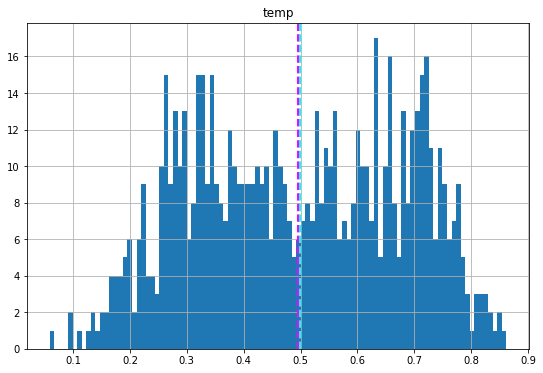

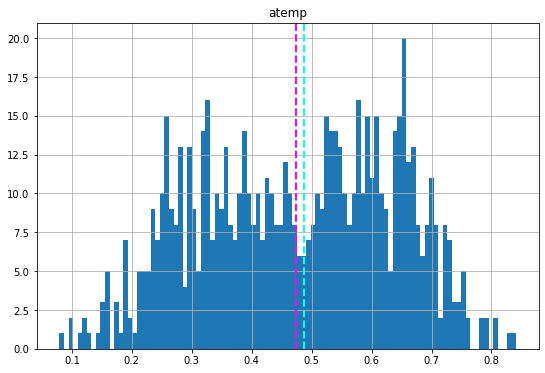

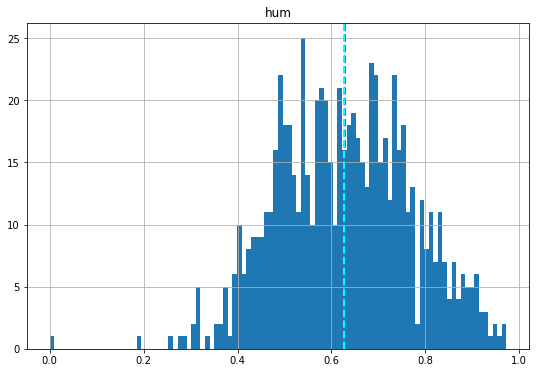

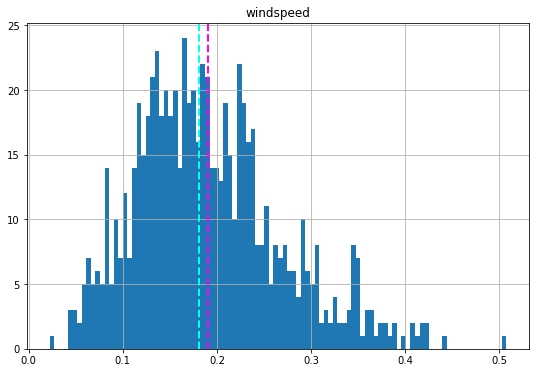

In [8]:
for col in numeric_features:
    fig = plt.figure(figsize = (9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins = 100)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

Numeric features looks normally distributed.

Now, lets separate test and train features.

In [9]:
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


We have the following four datasets:

- **X_train**: The feature values we'll use to train the model
- **y_train**: The corresponding labels we'll use to train the model
- **X_test**: The feature values we'll use to validate the model
- **y_test**: The corresponding labels we'll use to validate the model

Now we're ready to train a model by fitting a suitable regression algorithm to the training data. 


### 1. A new Linear Algorithm (Lasso)

Let's try training our regression model by using a **Lasso** algorithm. We can do this by just changing the estimator in the training code.

In [12]:
from sklearn.linear_model import Lasso
model = Lasso()

In [13]:
model.fit(X_train, y_train)

Lasso()

We have now trained our model using Lasso Algorithm.
Next, we should evaluate our model.

 Let's see if we can get a better indication by visualizing a scatter plot that compares the predictions to the actual labels. We'll also overlay a trend line to get a general sense for how well the predicted labels align with the true labels.

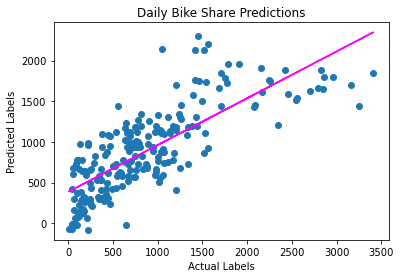

In [14]:
predictions = model.predict(X_test)

#plot actual label vs prediction
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

#overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Calculate various error merics.

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201155.70593338402
RMSE: 448.5038527519959
R2: 0.605646863782449


### 2. Decision Tree Algorithm (DecisionTreeRegressor)

Let's try training our regression model by using a **Decision Tree** algorithm.

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [17]:
#Training the model
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

As this is a Decision Tree, let's visualize our tree model.

In [18]:
# Visualize the model tree
tree = export_text(model_dt)
print(tree)

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_9 <= 0.33
|   |   |   |   |   |   |--- feature_6 <= 0.28
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_6 >  0.28
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |--- feature_9 >  0.33
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |   |--- feature_6 <= 0.28
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |   |--- feature_6 >  0.28
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |--- feature_8 >  0.40
|   |   |   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_8 >  0.40
|   |   |   |   |   |   |   |--- value: [532.00]
|   |   |   |

So now we have a tree-based model; but is it any good? Let's evaluate it with the test data.

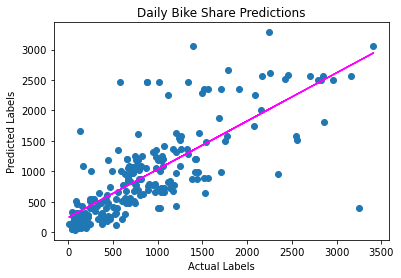

In [19]:
predictions_dt = model_dt.predict(X_test)
# Plot predicted vs actual
plt.scatter(y_test, predictions_dt)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions_dt, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [20]:
# Evaluate the model using the test data
mse = mean_squared_error(y_test, predictions_dt)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions_dt)
print("R2:", r2)

MSE: 247144.70909090908
RMSE: 497.13650951314077
R2: 0.515488309529482


### 2. Ensemble Algorithm (RandomForestRegressor)
Ensemble algorithms work by combining multiple base estimators to produce an optimal model, either by applying an aggregate function to a collection of base models (sometimes referred to a bagging) or by building a sequence of models that build on one another to improve predictive performance (referred to as boosting).

For example, let's try a Random Forest model, which applies an averaging function to multiple Decision Tree models for a better overall model.

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
#Train the model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

Time for visualization

In [23]:
predictions_rf = model_rf.predict(X_test)

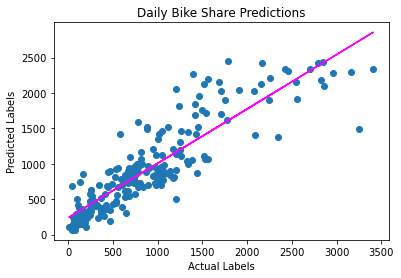

In [24]:
# Plot predicted vs actual
plt.scatter(y_test, predictions_rf)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions_rf, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Evaluating our Ensemble Algorithm using test data

In [25]:
mse = mean_squared_error(y_test, predictions_rf)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions_rf)
print("R2:", r2)


MSE: 110761.50445045457
RMSE: 332.8085101833404
R2: 0.7828590223203709


### 3. Boosting Ensemble Algorithm (GradientBoostingRegressor)
We'll use a Gradient Boosting estimator, which like a Random Forest algorithm builds multiple trees, but instead of building them all independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the loss (error) in the model.

GradientBoostingRegressor() 

MSE: 104137.97155425181
RMSE: 322.7041548450404
R2: 0.7958440428463244


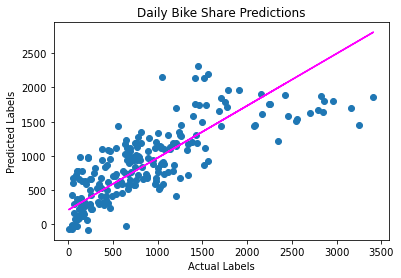

In [26]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a GradientBoostingRegressor model on the training set
model_gb = GradientBoostingRegressor().fit(X_train, y_train)
print (model_gb, "\n")

# Evaluate the model using the test data
predictions_gb = model_gb.predict(X_test)
mse = mean_squared_error(y_test, predictions_gb)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions_gb)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions_gb, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Hence, we tried 3 different algorithm and evaluating all of them, GradientBoostingRegressor looks best performing.